In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_protein_distribution(file_path, category):
    """
    Analyze the order distribution of proteins for a specified category

    Parameters:
    file_path (str): Path to the CSV file containing protein data
    category (str): Protein category to analyze

    Returns:
    DataFrame: Distribution statistics
    """
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Filter for specified category (case-insensitive)
    category_df = df[df['protein_category'].str.lower() == category.lower()].copy()

    if len(category_df) == 0:
        print(f"\nNo entries found for category: {category}")
        return None

    # Count the distribution by Order
    order_distribution = category_df['Order'].value_counts()

    # Create a DataFrame with the distribution
    distribution_df = pd.DataFrame({
        'Order': order_distribution.index,
        'Count': order_distribution.values,
        'Percentage': (order_distribution.values / len(category_df) * 100).round(2)
    })

    # Print summary statistics
    print(f"\nOrder distribution for {category}:")
    print(f"Total entries: {len(category_df)}")
    print("\nDistribution by Order:")
    print(distribution_df.to_string(index=False))

    return distribution_df

if __name__ == "__main__":
    # Example usage
    distribution_df = analyze_protein_distribution('toxins.csv', 'neurotoxin')


Order distribution for neurotoxin:
Total entries: 970

Distribution by Order:
            Order  Count  Percentage
          Araneae    956       98.56
Scolopendromorpha     13        1.34


In [2]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

def create_alluvial_plot(file_path):
    """
    Create an alluvial plot showing the relationship between Orders and protein categories

    Parameters:
    file_path (str): Path to the CSV file containing protein data
    """
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Remove rows where either protein_category or Order is NaN
    df = df.dropna(subset=['protein_category', 'Order'])

    # Get unique orders and categories (excluding NaN values)
    orders = sorted([order for order in df['Order'].unique() if pd.notna(order)])
    categories = sorted([cat for cat in df['protein_category'].unique() if pd.notna(cat)])

    # Create mapping dictionaries
    order_to_idx = {order: idx for idx, order in enumerate(orders)}
    category_to_idx = {cat: idx + len(orders) for idx, cat in enumerate(categories)}

    # Count frequencies
    frequencies = df.groupby(['Order', 'protein_category']).size().reset_index(name='count')

    # Prepare data for the Sankey diagram
    sources = [order_to_idx[order] for order in frequencies['Order']]
    targets = [category_to_idx[cat] for cat in frequencies['protein_category']]
    values = frequencies['count'].tolist()

    # Create labels for nodes
    labels = orders + categories

    # Create color scheme
    order_colors = [f'rgba(31, 119, 180, 0.8)'] * len(orders)  # Blue for orders
    category_colors = [f'rgba(255, 127, 14, 0.8)'] * len(categories)  # Orange for categories
    node_colors = order_colors + category_colors

    # Print verification information
    print("\nVerification of counts:")
    print("\nBy Order:")
    order_counts = df['Order'].value_counts()
    print(order_counts)

    print("\nBy Protein Category:")
    category_counts = df['protein_category'].value_counts()
    print(category_counts)

    print("\nDetailed connections:")
    print(frequencies.sort_values(['Order', 'protein_category']))

    # Create the figure
    fig = go.Figure(data=[go.Sankey(
        node = dict(
            pad = 15,
            thickness = 20,
            line = dict(color = "black", width = 0.5),
            label = labels,
            color = node_colors
        ),
        link = dict(
            source = sources,
            target = targets,
            value = values,
            color = [f'rgba(173, 216, 230, 0.5)'] * len(sources)  # Light blue for links
        )
    )])

    # Update layout
    fig.update_layout(
        title_text="Order to Protein Category Distribution",
        font_size=12,
        height=800
    )

    # Show the plot
    fig.show()

    return fig, frequencies

if __name__ == "__main__":
    # Create the alluvial plot
    fig, frequencies = create_alluvial_plot('toxins.csv')


Verification of counts:

By Order:
Order
Squamata             1448
Araneae              1141
Neogastropoda        1003
Scorpiones            671
Scolopendromorpha     154
Hymenoptera           109
Trebouxiales            2
Valvatida               2
Lepidoptera             1
Scutigeromorpha         1
Blenniiformes           1
Name: count, dtype: int64

By Protein Category:
protein_category
neurotoxin               969
conotoxin                953
three_finger_toxin       480
scorpion_long_toxin      386
phospholipase_a2         280
scorpion_ktx             232
metalloproteinase        176
peptidase                145
scoloptoxin              141
snaclec                  133
venom_kunitz             107
cationic_peptide          86
bradykinin_related        76
mcd_related               74
crisp_related             38
hormone_related           35
ngf                       34
disintegrin               33
phospholipase_other       28
antimicrobial_peptide     26
scorpion_short_toxin      2

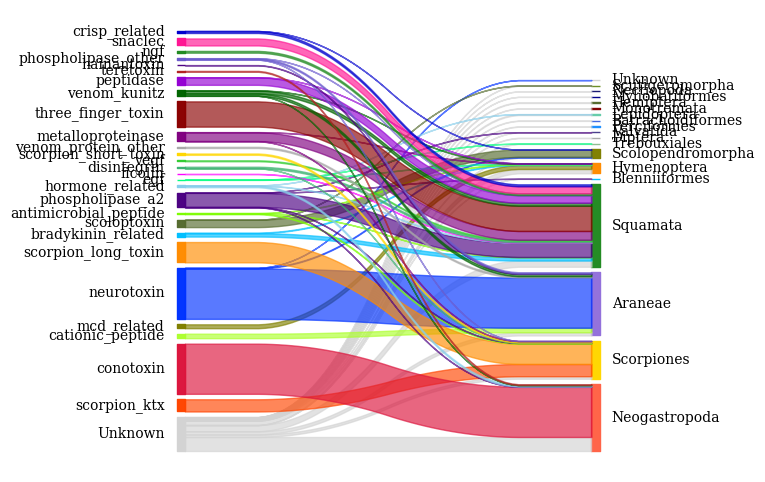

In [41]:
import pandas as pd
from pySankey.sankey import sankey
import matplotlib.pyplot as plt

def create_alluvial_plot(file_path):
    """
    Create an alluvial plot showing Order to protein category relationships
    """
    # Color mappings
    order_colors = {
        "Neogastropoda": "#FF6347",
        "Scorpiones": "#FFD700",
        "Araneae": "#9370DB",
        "Squamata": "#228B22",
        "Blenniiformes": "#00BFFF",
        "Perciformes": "#1E90FF",
        "Batrachoidiformes": "#4169E1",
        "Myliobatiformes": "#00008B",
        "Hymenoptera": "#FF8C00",
        "Scolopendromorpha": "#808000",
        "Scutigeromorpha": "#6B8E23",
        "Trebouxiales": "#8FBC8F",
        "Diptera": "#A9A9A9",
        "Valvatida": "#483D8B",
        "Lepidoptera": "#66CDAA",
        "Monotremata": "#800000",
        "Hemiptera": "#556B2F",
        "Nectiopoda": "#191970"
    }

    protein_colors = {
        "scorpion_ktx": "#FF4500",
        "scorpion_long_toxin": "#FF8C00",
        "scorpion_short_toxin": "#FFD700",
        "conotoxin": "#DC143C",
        "teretoxin": "#B22222",
        "three_finger_toxin": "#8B0000",
        "neurotoxin": "#0032FF",
        "metalloproteinase": "#800080",
        "peptidase": "#9400D3",
        "phospholipase_a2": "#4B0082",
        "phospholipase_other": "#6A5ACD",
        "crisp_related": "#0000CD",
        "bradykinin_related": "#00BFFF",
        "hormone_related": "#87CEEB",
        "egf": "#00FF7F",
        "vegf": "#32CD32",
        "ngf": "#228B22",
        "ficolin": "#FF00FF",
        "snaclec": "#FF1493",
        "venom_kunitz": "#006400",
        "disintegrin": "#3CB371",
        "antimicrobial_peptide": "#7CFC00",
        "cationic_peptide": "#ADFF2F",
        "scoloptoxin": "#556B2F",
        "mcd_related": "#808000",
        "venom_protein_other": "#A9A9A9",
        "hainantoxin": "#4B0082"
    }

    # Read the data
    df = pd.read_csv(file_path)

    # Replace NaN with "Unknown"
    df['Order'] = df['Order'].fillna('Unknown')
    df['protein_category'] = df['protein_category'].fillna('Unknown')

    # Add Unknown color
    order_colors['Unknown'] = '#D3D3D3'
    protein_colors['Unknown'] = '#D3D3D3'

    # Create the plot
    # plt.figure(figsize=(30, 10))
    sankey(
        left=df['protein_category'],
        right=df['Order'],
        fontsize=10, aspect=5,
        colorDict={**order_colors, **protein_colors},
        figure_name="alluvial_plot"
    )

    return df

if __name__ == "__main__":
    df = create_alluvial_plot('toxins.csv')